# Dimensionality Reduction

## 1. Principal Component Analysis

### a. Data Prep

In [19]:
# read in entertainment data
import pandas as pd

df = pd.read_csv('../Data/entertainment_clean.csv')
df.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [20]:
# remove the name column
data = df.iloc[:, 1:]
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [21]:
# view the mean of each column of the data
data.mean()

books          2.993333
tv_shows       4.586000
video_games    5.843333
dtype: float64

In [22]:
# center the data
df_centered = data - data.mean()
df_centered.head()

,books,tv_shows,video_games
0,-2.493333,0.014,-0.943333
1,-2.993333,-0.086,-1.043333
2,-2.493333,-0.086,-0.843333
3,0.506667,-0.086,0.756667
4,-0.193333,-0.786,-0.243333


In [23]:
# view the mean of each column of the centered data
df_centered.mean()

books          1.287859e-16
tv_shows      -3.434290e-16
video_games   -3.730349e-16
dtype: float64

### b. Apply PCA

In [24]:
# import pca from sklearn
from sklearn.decomposition import PCA

In [25]:
# fit a pca model on the centered data
pca = PCA(n_components=2)
pca.fit(df_centered)

PCA(n_components=2)

In [26]:
# view the explained variance ratio
pca.explained_variance_ratio_

array([0.88175186, 0.08603611])

In [27]:
# fit a pca model on the centered data
pca3 = PCA(n_components=3)
pca3.fit(df_centered)

PCA(n_components=3)

In [28]:
# view the explained variance ratio on full data set
pca3.explained_variance_ratio_

array([0.88175186, 0.08603611, 0.03221203])

In [29]:
# view the explained variance ratio on full data set
pca3.explained_variance_

array([4.21502402, 0.41127702, 0.15398264])

In [30]:
# it adds up to 1
sum(pca3.explained_variance_ratio_)

0.9999999999999999

### c. Interpret PCA Outputs

In [31]:
# view the new components, or new x and y axes (-1 to +1)
pca.components_

array([[ 0.93143032, -0.11629655,  0.34483717],
       [-0.04900906,  0.89884697,  0.43551376]])

In [32]:
# view the columns again
df_centered.columns

Index(['books', 'tv_shows', 'video_games'], dtype='object')

* Principal Component 1 aka PC1 aka the x-axis: higher means more books + video games
* Principal Component 2 aka PC2 aka the y-axis: higher means more tv_shows + video games

In [33]:
df_centered.head(3)

,books,tv_shows,video_games
0,-2.493333,0.014,-0.943333
1,-2.993333,-0.086,-1.043333
2,-2.493333,-0.086,-0.843333


In [34]:
# Crunch the data down to 2 columns (from 3 columns)
xyz = pca.transform(df_centered)
xyz[:3]

array([[-2.64929081, -0.27605485],
       [-3.13786003, -0.38498639],
       [-2.60317744, -0.32238817]])

In [35]:
# view the transformed data (part 2 of fit -> transform)
# transform from 3 columns to 2 columns
df_transformed = pd.DataFrame(pca.transform(df_centered), columns=['pc1', 'pc2'])
df_transformed.head() 

,pc1,pc2
0,-2.649291,-0.276055
1,-3.137860,-0.384986
2,-2.603177,-0.322388
3,0.742853,0.227407
4,-0.172578,-0.802994


In [36]:
df_centered.shape, df_transformed.shape

((150, 3), (150, 2))

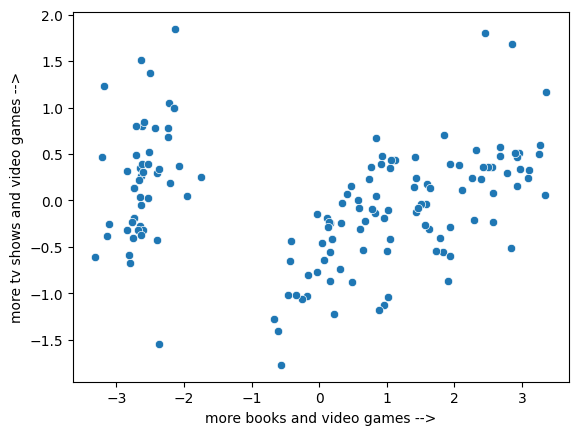

In [37]:
# view the data on a scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='pc1', y='pc2', data=df_transformed)
plt.xlabel('more books and video games -->')
plt.ylabel('more tv shows and video games -->');

#### Cereal Example

In [38]:
# read in the cereal data
cereal_data = pd.read_csv('../Data/cereal.csv')
cereal_data

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,100%_Bran,Nabisco,70,4,1,6,25
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0
2,All-Bran,Kelloggs,70,4,1,5,25
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25
4,Almond_Delight,Ralston Purina,110,2,2,8,25
...,...,...,...,...,...,...,...
69,Triples,General Mills,110,2,1,3,25
70,Trix,General Mills,110,1,1,12,25
71,Wheat_Chex,Ralston Purina,100,3,1,3,25
72,Wheaties,General Mills,100,3,1,3,25


In [39]:
# view the nutritional facts of a subset of the data
cereal = cereal_data[['Calories', 'Protein (g)', 'Sugars', 'Vitamins and Minerals']]
cereal.head()

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,70,4,6,25
1,120,3,8,0
2,70,4,5,25
3,50,4,0,25
4,110,2,8,25


In [40]:
# center and scale the data
from sklearn.preprocessing import StandardScaler

cereal_scaler = StandardScaler()
cereal_std = cereal_scaler.fit_transform(cereal)
cereal_centered = pd.DataFrame(cereal_std)
cereal_centered.head()

,0,1,2,3
0,-1.940286,1.387392,-0.173586,-0.149270
1,0.789394,0.462464,0.277129,-1.253871
2,-1.940286,1.387392,-0.398944,-0.149270
3,-3.032158,1.387392,-1.525731,-0.149270
4,0.243458,-0.462464,0.277129,-0.149270


In [41]:
# fit a pca model
pca_cereal = PCA(n_components=2)
pca_cereal.fit(cereal_centered)

PCA(n_components=2)

In [42]:
# note the explained variance (~2/3, which is pretty good!)
pca_cereal.explained_variance_ratio_

array([0.44781923, 0.27520966])

In [43]:
# view the components
pca_cereal.components_

array([[-0.59747165,  0.35719665, -0.6401387 , -0.3250548 ],
       [ 0.2800528 ,  0.68024865, -0.20898945,  0.6443257 ]])

In [44]:
# view the columns
cereal.columns

Index(['Calories', 'Protein (g)', 'Sugars', 'Vitamins and Minerals'], dtype='object')

**Component interpretations:**
* PC1: higher = protein | lower = sugar + calories
* PC2: higher = protein + vitamins + minerals (aka healthy things)

In [45]:
# transform the original data into the pc1/pc2 space
cereal_2d = pd.DataFrame(pca_cereal.transform(cereal_centered), columns=['PC1', 'PC2'])
cereal_2d.head()

,PC1,PC2
0,1.814478,0.340488
1,-0.076274,-0.330156
2,1.958738,0.387585
3,3.332400,0.317290
4,-0.439530,-0.400505


In [46]:
# Plotly requires extra configuration for jupyter lab
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'notebook' or 'colab' or 'jupyterlab' 

In [47]:
import plotly.graph_objects as go

# Create a Plotly scatter plot with labels
fig = go.Figure()

# Scatter plot trace
scatter_trace = go.Scatter(
    x=cereal_2d['PC1'],
    y=cereal_2d['PC2'],
    mode='markers',
    marker=dict(color='blue', size=10),
    text=cereal_data['Cereal Name'],  # Labels for hover
)

# Add trace to the figure
fig.add_trace(scatter_trace)

# Add data labels using annotations
for i, label in enumerate(cereal_data['Cereal Name']):
    fig.add_annotation(
        x=cereal_2d['PC1'].iloc[i],
        y=cereal_2d['PC2'].iloc[i],
        text=label,
        showarrow=False,
        xanchor='left',
        xshift=5,
        font=dict(color='black', size=10),
    )

# Update layout with axis labels
fig.update_layout(
    title='Comparing Cereals by Nurtitional Facts',
    xaxis=dict(title='<-- Higher Sugar & Calorie Cereals          Higher Protein Cereals -->'),
    yaxis=dict(title='Higher Protein, Vitmains and Minerals Cereals -->'),
    height=650,
    width=800,
)

# Show the interactive plot
fig.show()

In [48]:
# view raisin bran
cereal_data[cereal_data['Cereal Name'] == 'Total_Raisin_Bran']

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
67,Total_Raisin_Bran,General Mills,140,3,1,14,100


In [49]:
# view count chocula
cereal_data[cereal_data['Cereal Name'] == 'Count_Chocula']

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
18,Count_Chocula,General Mills,110,1,1,13,25


In [50]:
# view cheerios
cereal_data[cereal_data['Cereal Name'] == 'Cheerios']

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
11,Cheerios,General Mills,110,6,2,1,25


In [51]:
# view puffed rice
cereal_data[cereal_data['Cereal Name'] == 'Puffed_Rice']

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
51,Puffed_Rice,Quaker Oats,50,1,0,0,0


## 2. t-SNE

### a. Example 1: Entertainment Data

In [69]:
# Read in the data
import pandas as pd
df = pd.read_csv('../Data/entertainment_clean.csv')
data = df.iloc[:, 1:]
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [53]:
# import tsne from sklearn
from sklearn.manifold import TSNE
import seaborn as sns

In [54]:
# create a tsne object
tsne = TSNE(n_components=2, random_state=100)

In [55]:
# fit a model and transform the data into a lower dimensionality space
data_tsne = tsne.fit_transform(data)

In [56]:
data_tsne[:5]

array([[-21.371656  ,  11.7108555 ],
       [-22.604843  ,  11.786001  ],
       [-21.559769  ,  12.069097  ],
       [  5.3681355 ,  -6.8470902 ],
       [  0.18511544,  -7.5757184 ]], dtype=float32)

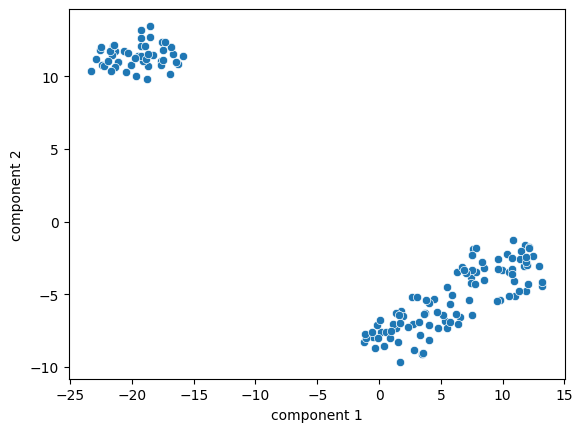

In [57]:
# plot the data
df_tsne = pd.DataFrame(data_tsne, columns=['component 1','component 2'])

sns.scatterplot(x='component 1', y='component 2', data=df_tsne); 

### b. Example 2: Cereal Data

In [58]:
cereal_data = pd.read_csv('../Data/cereal.csv')
cereal = cereal_data[['Calories', 'Protein (g)', 'Sugars', 'Vitamins and Minerals']]
cereal.head()

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,70,4,6,25
1,120,3,8,0
2,70,4,5,25
3,50,4,0,25
4,110,2,8,25


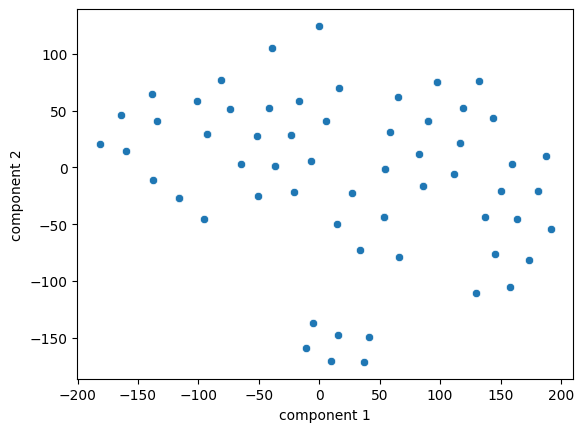

In [59]:
# create a tsne object
tsne_cereal = TSNE(n_components=2) # , random_state=42)

# fit a model and transform the data into a lower dimensionality space
data_tsne_cereal = tsne.fit_transform(cereal)

# plot the data
df_tsne_cereal = pd.DataFrame(data_tsne_cereal, columns=['component 1','component 2'])

sns.scatterplot(x='component 1', y='component 2', data=df_tsne_cereal);

In [60]:
import plotly.graph_objects as go

# Create a Plotly scatter plot with labels
fig = go.Figure()

# Scatter plot trace
scatter_trace = go.Scatter(
    x=df_tsne_cereal['component 1'],
    y=df_tsne_cereal['component 2'],
    mode='markers',
    marker=dict(color='blue', size=10),
    text=cereal_data['Cereal Name'],  # Labels for hover
)

# Add trace to the figure
fig.add_trace(scatter_trace)

# Add data labels using annotations
for i, label in enumerate(cereal_data['Cereal Name']):
    fig.add_annotation(
        x=df_tsne_cereal['component 1'].iloc[i],
        y=df_tsne_cereal['component 2'].iloc[i],
        text=label,
        showarrow=False,
        xanchor='left',
        xshift=5,
        font=dict(color='black', size=10),
    )

# Update layout with axis labels
fig.update_layout(
    title='Comparing Cereals by Nurtitional Facts',
    xaxis=dict(title='Component 1'),
    yaxis=dict(title='Component 2'),
    height=650,
    width=1000,
)

# Show the interactive plot
fig.show()

## 3. Dimensionality Reduction + Clustering: Layer on Colors for Clusters

#### i. Visualize K-Means Clusters on the Entertainment Data

In [61]:
df_centered.head()

,books,tv_shows,video_games
0,-2.493333,0.014,-0.943333
1,-2.993333,-0.086,-1.043333
2,-2.493333,-0.086,-0.843333
3,0.506667,-0.086,0.756667
4,-0.193333,-0.786,-0.243333


In [70]:
# Import KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42)

# Fit the model to the data
kmeans.fit(df_centered)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

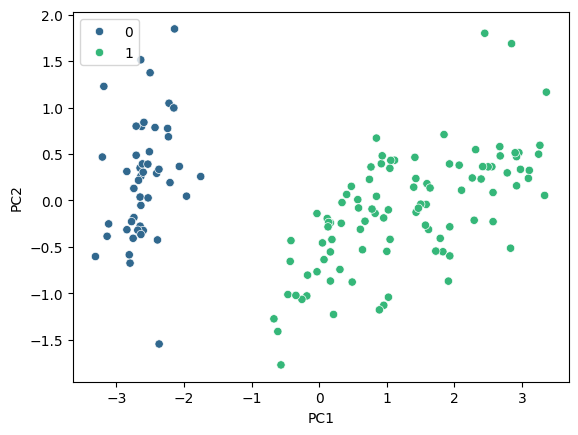

In [72]:
# Plot the PCA results with colors
data_ = pd.DataFrame(pca.transform(df_centered), columns=['PC1','PC2'])
sns.scatterplot(x='PC1', y='PC2', data=data_, hue=labels, palette='viridis');

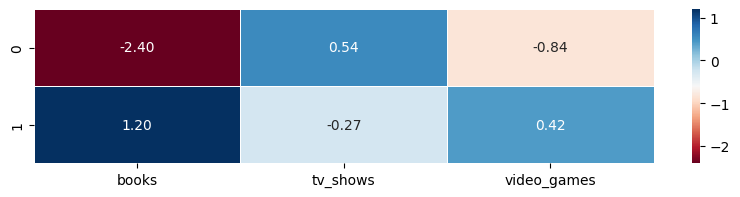

In [75]:
# Interpret the cluster centers

# Create a DataFrame for the heatmap
centroids_df = pd.DataFrame(centroids, columns=data.columns)

# Create the heatmap
plt.figure(figsize=(10, 2))
sns.heatmap(centroids_df, annot=True, cmap="RdBu", fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

**Cluster interpretations:**
* Cluster 0 reads very few books and watches more tv shows
* Cluster 1 reads more books and plays more video games

#### ii. Visualize K-Means Clusters on the Cereal Data

In [76]:
# Try the same with the cereal data
kmeans_cereal = KMeans(n_clusters=5, n_init='auto', random_state=42)

# Fit the model to the data
kmeans_cereal.fit(cereal_centered)

# Get the cluster labels
labels_cereal = kmeans_cereal.labels_

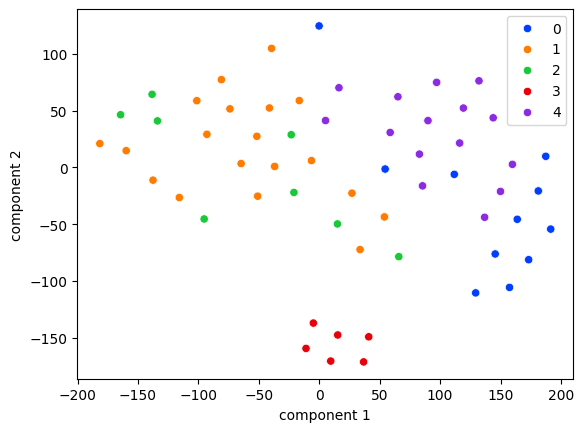

In [77]:
# Plot the t-SNE results with colors
sns.scatterplot(x='component 1',
                y='component 2',
                data=df_tsne_cereal, hue=labels_cereal, palette='bright');

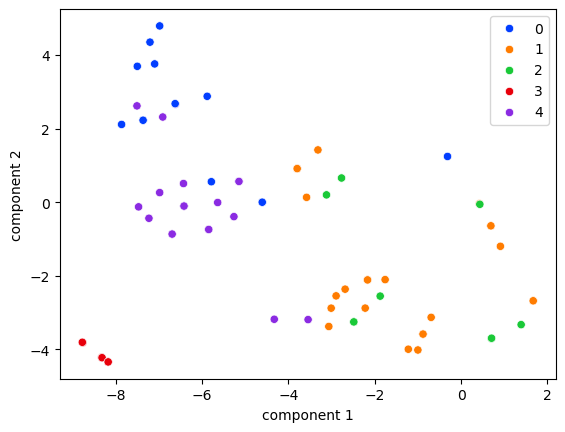

In [42]:
# Plot the t-SNE results with colors
sns.scatterplot(x='component 1',
                y='component 2',
                data=df_tsne_cereal, hue=labels_cereal, palette='bright');

#### iii. Apply K-Means Clustering on the Cereal T-SNE Plot

In [78]:
# Try the same with the cereal t-SNE plot
kmeans_cereal_tsne = KMeans(n_clusters=5, n_init='auto', random_state=42)

# Fit the model to the data
kmeans_cereal_tsne.fit(df_tsne_cereal)

# Get the cluster labels
labels_cereal_tsne = kmeans_cereal_tsne.labels_

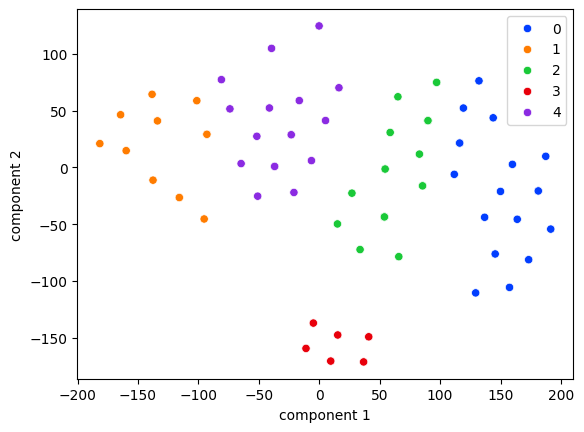

In [79]:
# t-SNE plot with coloring
sns.scatterplot(x='component 1',
                y='component 2',
                data=df_tsne_cereal, hue=labels_cereal_tsne, palette='bright');

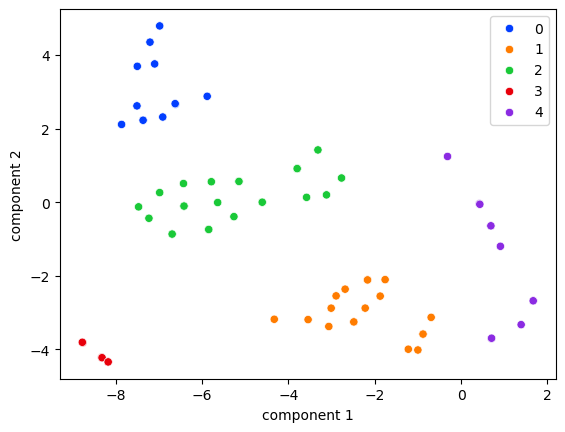

In [44]:
# t-SNE plot with coloring
sns.scatterplot(x='component 1',
                y='component 2',
                data=df_tsne_cereal, hue=labels_cereal_tsne, palette='bright');